In [1]:
pip install pyforest 

Note: you may need to restart the kernel to use updated packages.


importing library

In [2]:
from pyforest import*
lazy_imports()

['import re',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.preprocessing import RobustScaler',
 'import cv2',
 'import skimage',
 'import dash',
 'import matplotlib as mpl',
 'import tqdm',
 'from sklearn.ensemble import RandomForestClassifier',
 'import datetime as dt',
 'import textblob',
 'from sklearn.linear_model import LassoCV',
 'import plotly.express as px',
 'import sys',
 'from openpyxl import load_workbook',
 'from sklearn.impute import SimpleImputer',
 'import plotly as py',
 'import fbprophet',
 'from sklearn.decomposition import PCA',
 'import altair as alt',
 'import bokeh',
 'from fbprophet import Prophet',
 'import lightgbm as lgb',
 'import nltk',
 'import plotly.graph_objs as go',
 'from scipy import stats',
 'from dask import dataframe as dd',
 'from pathlib import Path',
 'import numpy as np',
 'import os',
 'from sklearn.manifold import TSNE',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import sklearn',
 'from sklearn.mode

Opening dataset

In [3]:
df=pd.read_csv("BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

Understanding Data 

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
#shape
df.shape

(1372, 5)

In [6]:
#distibution between 0 and 1 in class
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [7]:
#checking for null values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
#types of objects 
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

<br>
Visualizations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_22352\4199247164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'], color='blue')
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

<Axes: title={'center': 'Distibution of"class" attribute'}, xlabel='class', ylabel='Density'>

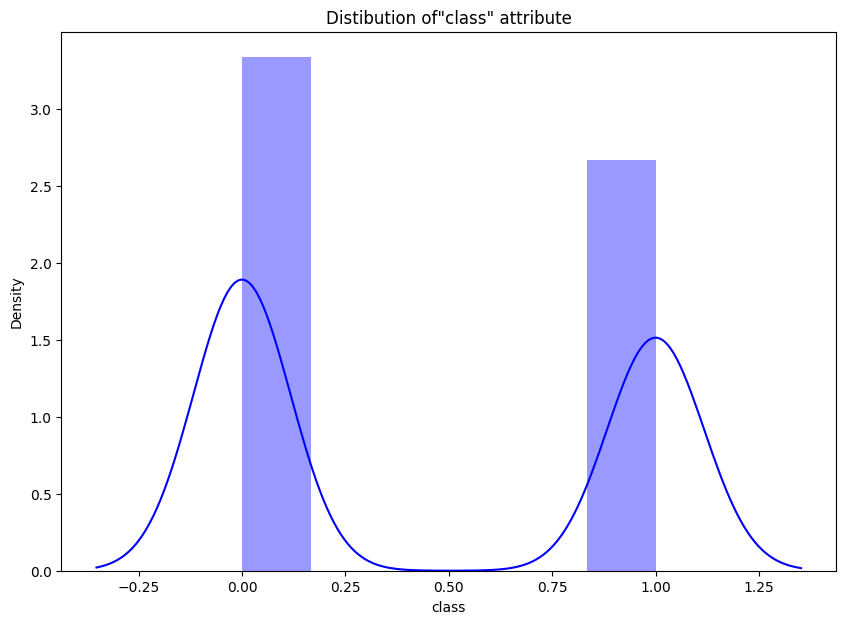

In [9]:
plt.figure(figsize=(10,7))
plt.title('Distibution of"class" attribute')
sns.distplot(df['class'], color='blue')

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>,
        <Axes: title={'center': 'curtosis'}>],
       [<Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

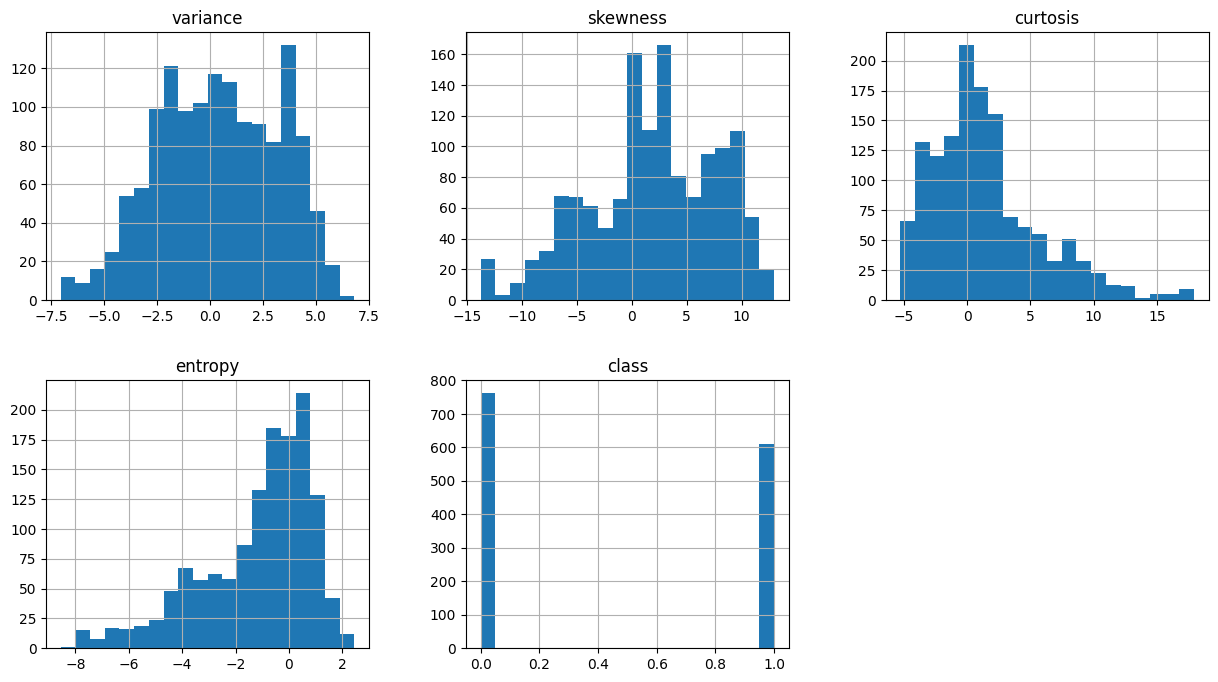

In [10]:
#hystogram
df.hist(bins=20,figsize=(15,8),layout=(2,3))

In [11]:
import warnings
warnings.filterwarnings('ignore')


<IPython.core.display.Javascript object>

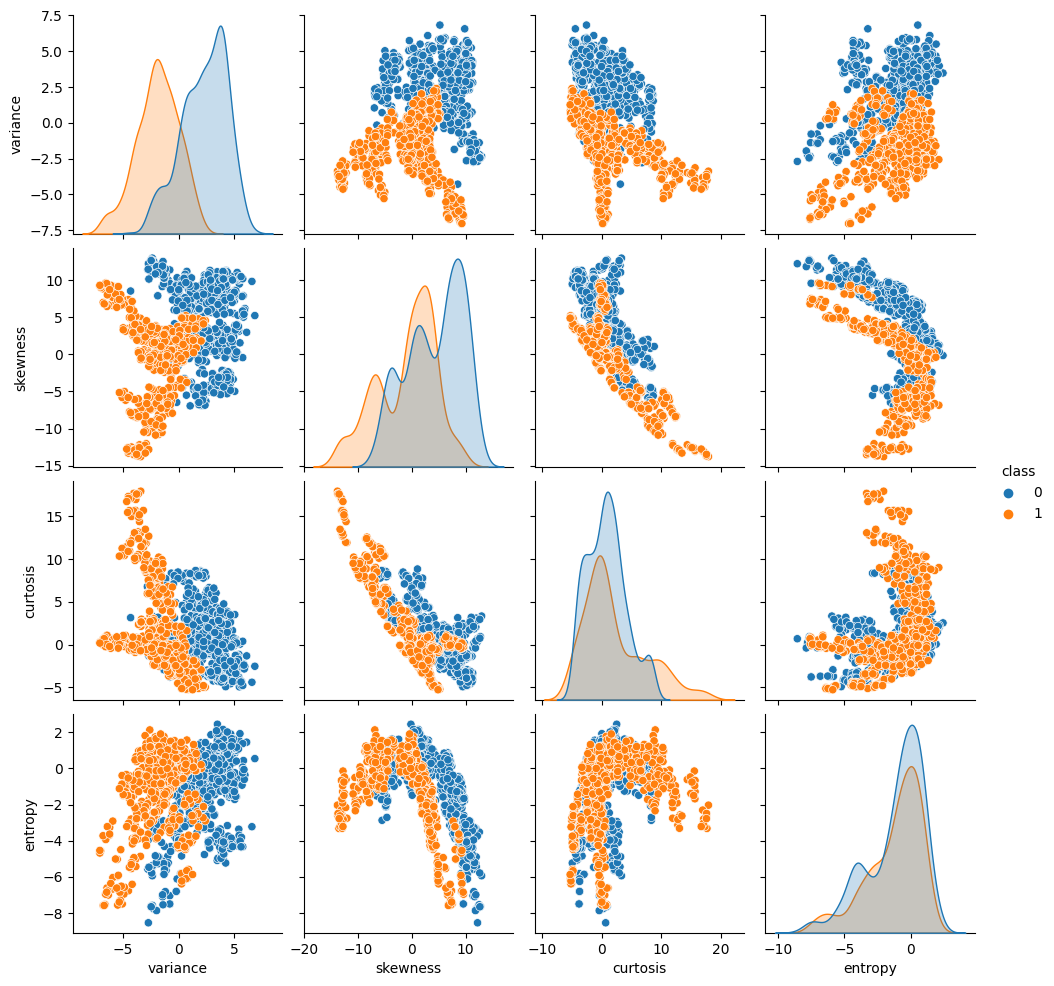

In [12]:
sns.pairplot(df, hue='class')

Data for modeling 


In [13]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [14]:
x= df[['variance','skewness','curtosis','entropy']]

In [15]:
x=df.drop('class', axis=1)
y=df['class']

In [16]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=1)

<IPython.core.display.Javascript object>

#Scaling the variables in the data set. The reason being when calulating the distance between variables, ensure the [root of (a -b)2 + (c-d)2 +n  ] doenst out scale the other variable as some of them are in '-' will become + and mess it up. 

scaling = 1. standard scaler , 2. z score 

scaling before splititng the data would mean that testing  data  may be seen and data laecage may happen. cause z score = the mean from each data point and then dived by standard diveation. 

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler

In [19]:


# Initialize the scaler
scaler = StandardScaler()  # Replace with the appropriate scaler if needed

# Fit the scaler on the training data and transform both training and testing data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [21]:

classifier = LogisticRegression(solver='liblinear', random_state=1)

# Fit the classifier on the training data
classifier.fit(x_train, y_train)

# Perform 10-fold cross-validation and print the accuracies
accuracies = cross_val_score(classifier, x_train, y_train, cv=10)
print('Accuracies:\n', accuracies)


Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [22]:
print ("mean accuracy:", accuracies.mean())

mean accuracy: 0.9835863219349459


In [23]:
classifier_pred=classifier.predict(x_test)
classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

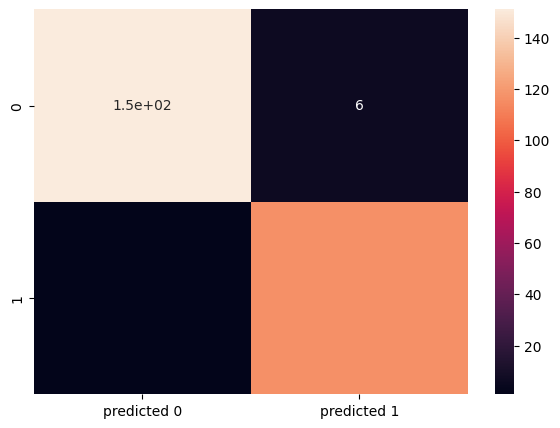

In [24]:
from sklearn import metrics 
cm= metrics.confusion_matrix(y_test, classifier_pred, labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ["predicted 0", "predicted 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

SVM- support vector machine 

In [25]:
from sklearn.svm import SVC  # Correct import statement

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Fit the SVM classifier on the training data
svm_classifier.fit(x_train, y_train)

# Perform 10-fold cross-validation and print the accuracies
svm_accuracies = cross_val_score(svm_classifier, x_train, y_train, cv=10)
print('Accuracies:\n', svm_accuracies)
print("Mean accuracy:", svm_accuracies.mean())


Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean accuracy: 0.9854045037531277


<IPython.core.display.Javascript object>

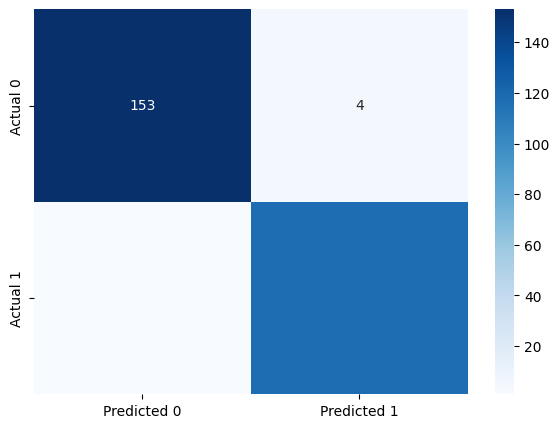

In [26]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels from the SVM classifier
svm_pred = svm_classifier.predict(x_test)

# Compute the confusion matrix for SVM predictions
cm = metrics.confusion_matrix(y_test, svm_pred, labels=[0, 1])

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.show()


SMV Rbf kernal 

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0


<IPython.core.display.Javascript object>

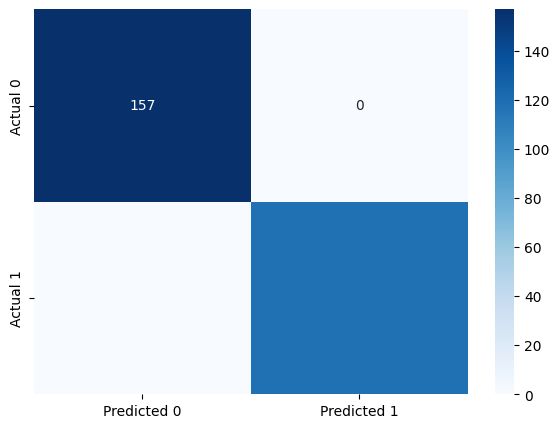

In [27]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Create an SVM classifier with an RBF kernel
rbf_classifier = SVC(kernel='rbf')

# Fit the SVM classifier on the training data
rbf_classifier.fit(x_train, y_train)

# Perform 10-fold cross-validation and print the accuracies
rbf_accuracies = cross_val_score(rbf_classifier, x_train, y_train, cv=10)
print('Accuracies:\n', rbf_accuracies)
print("Mean accuracy:", rbf_accuracies.mean())

# Get the predicted labels from the SVM classifier
rbf_pred = rbf_classifier.predict(x_test)

# Compute the confusion matrix for SVM predictions
rbf_cm = metrics.confusion_matrix(y_test, rbf_pred, labels=[0, 1])

# Create a DataFrame for the confusion matrix
df_rbf_cm = pd.DataFrame(rbf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_rbf_cm, annot=True, fmt="d", cmap="Blues")
plt.show()


Random forest classifier 

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier= RandomForestClassifier(n_estimators=50,criterion='entropy', random_state=1)

rfc_classifier.fit(x_train,y_train)

rfc_accuracies = cross_val_score(rfc_classifier, x_train, y_train, cv=10)
print('Accuracies:\n', rfc_accuracies)
print("Mean accuracy:", rfc_accuracies.mean())

Accuracies:
 [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]
Mean accuracy: 0.9927272727272728


<IPython.core.display.Javascript object>

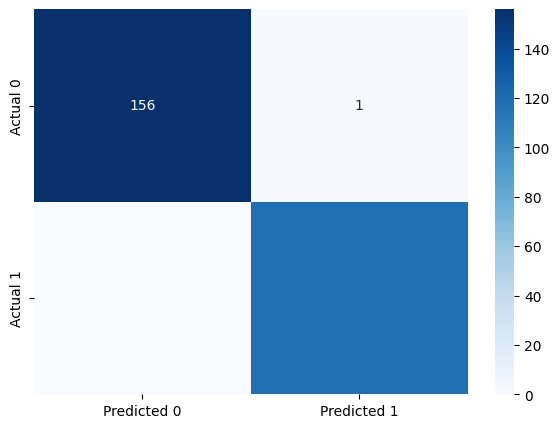

In [29]:
# Get the predicted labels from the Random Forest classifier
rfc_pred = rfc_classifier.predict(x_test)

# Compute the confusion matrix for Random Forest predictions
rfc_cm = metrics.confusion_matrix(y_test, rfc_pred, labels=[0, 1])

# Create a DataFrame for the confusion matrix
df_rfc_cm = pd.DataFrame(rfc_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_rfc_cm, annot=True, fmt="d", cmap="Blues")
plt.show()


Knieghbour Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'leaf_size': [2, 5, 7, 9, 11],
    'n_neighbors': [2, 5, 7, 9, 11],
    'p': [1, 2]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=KFold(n_splits=5))
grid.fit(x_train, y_train)

# Print the best parameters and their corresponding score
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best parameters found:  {'leaf_size': 2, 'n_neighbors': 2, 'p': 1}
Best cross-validation score: 1.00


In [31]:
KNN=KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2)

In [32]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [33]:
KNN_pred=KNN.predict(x_test)
KNN_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

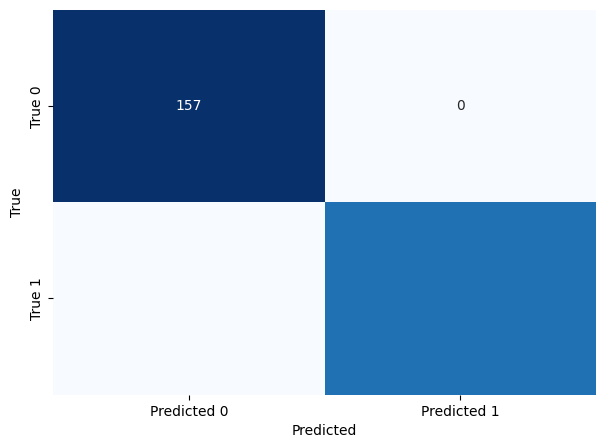

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, KNN_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index=[i for i in ["True 0", "True 1"]], columns=[i for i in ["Predicted 0", "Predicted 1"]])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors=2) 
knn_accuracies = cross_val_score(knn_classifier, x_train, y_train, cv=10)
print('Accuracies:\n', knn_accuracies)
print("Mean accuracy:", knn_accuracies.mean())

Accuracies:
 [0.99090909 0.99090909 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean accuracy: 0.9981818181818183


MULTILAYER PERCEPTION

In [36]:
from sklearn.neural_network import MLPClassifier
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000,alpha=0.0001,solver='sgd',verbose=10,random_state=21,tol=0.000000001)

multi_classifier.fit(x_train,y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [37]:
multi_pred=multi_classifier.predict(x_test)

<IPython.core.display.Javascript object>

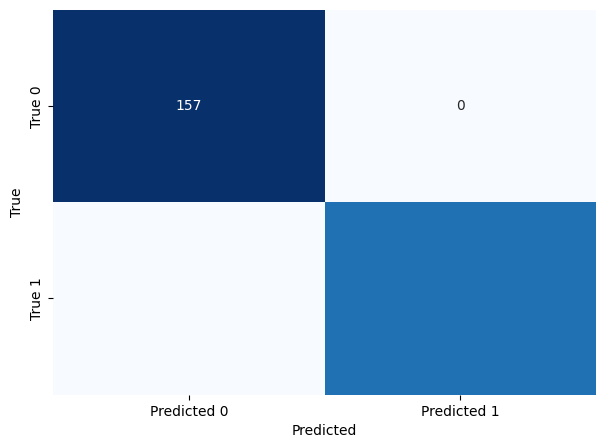

In [38]:
cm = metrics.confusion_matrix(y_test, multi_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index=[i for i in ["True 0", "True 1"]], columns=[i for i in ["Predicted 0", "Predicted 1"]])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Print out each algorithm Accuracy values

In [39]:
print ('Logicstic Regression:',accuracies.mean())
print ('Support Vector Machine(kernal=liblinear):',svm_accuracies.mean())
print ('Support Vector Machine(kernal=Rfc):',rbf_accuracies.mean())
print ('Random Forest:',rfc_accuracies.mean())
print ('KNN:',knn_accuracies.mean())






Logicstic Regression: 0.9835863219349459
Support Vector Machine(kernal=liblinear): 0.9854045037531277
Support Vector Machine(kernal=Rfc): 1.0
Random Forest: 0.9927272727272728
KNN: 0.9981818181818183
